The following notebok contains the program specified in the tutorial and addition models trying to find the best model for the problem.

In [128]:
import pandas as pd
import numpy as np

# data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv')
data = pd.read_csv('supplement.csv')

In [129]:
# store the data in a .csv file
data.to_csv('supplement.csv')

In [130]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [131]:
data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [133]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [134]:
# !pip install plotly

In [135]:
import plotly.express as px

In [136]:
pie = data['Store_Type'].value_counts()
store = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=store, title='Store with maximum orders')
fig.show()

In [137]:
pie = data['Location_Type'].value_counts()
priority = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=priority, title='Order Priority')
fig.show()


In [138]:
pie = data['Region_Code'].value_counts()
priority = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=priority, title='Region Code')
fig.show()


In [139]:
pie = data['Discount'].value_counts()
priority = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=priority, title='Discount')
fig.show()


In [140]:
pie = data['Holiday'].value_counts()
priority = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=priority, title='Holiday')
fig.show()


preprocessing the data

In [141]:
data['Discount'] = data['Discount'].map({'Yes': 1, 'No': 0})

In [142]:
data['Store_Type'] = data['Store_Type'].map({'Grocery Store': 0, 'S1': 1, 'S2': 2, 'S3': 3,'S4': 4})

In [143]:
data['Location_Type'] = data['Location_Type'].map({'L1': 1, 'L2': 2, 'L3': 3, 'L4': 4, 'L5': 5})

In [144]:
# Gradian Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X = np.array(data[['Store_Type', 'Location_Type', 'Discount', 'Holiday']])
y = np.array(data['#Order'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [145]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)



GradientBoostingRegressor(random_state=0)

In [146]:
#traning and testing score
print("Training Score:", reg.score(X_train, y_train))
print("Testing Score:", reg.score(X_test, y_test))

# predicting the values
y_pred = reg.predict(X_test)

# comparing the actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()




Training Score: 0.5930662285389201
Testing Score: 0.5918113888982299


,Actual,Predicted
0,54,47.996310
1,111,97.807127
2,59,66.697888
3,67,84.716457
4,60,54.514961


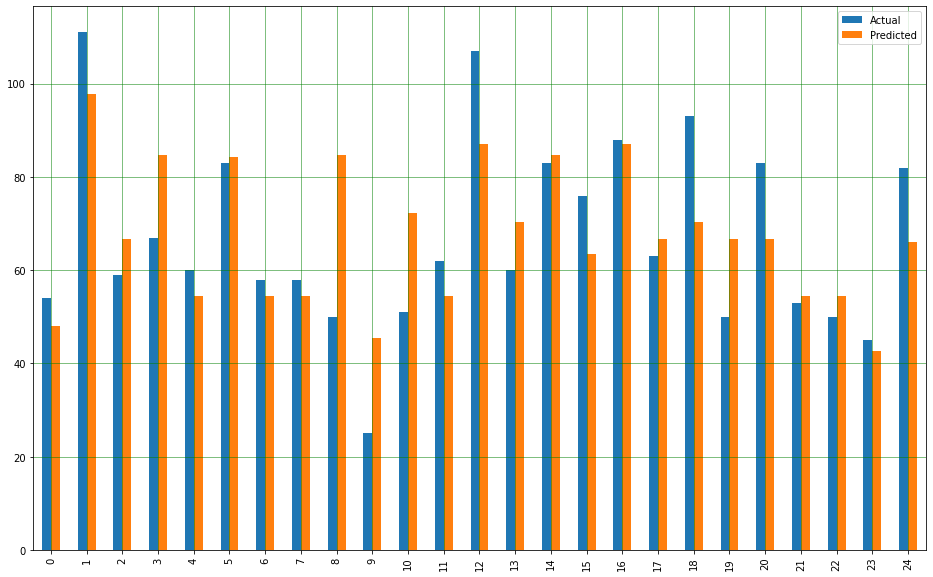

In [147]:
# plotting all the actual and predicted values

import matplotlib.pyplot as plt

df1 = df.head(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
#calculate the metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  379.35315528776374
Mean Absolute Error:  13.385327363426164


In [149]:
# !pip install lightgbm

In [150]:
import lightgbm as lgb

model = lgb.LGBMRegressor()

In [151]:
model.fit(X_train, y_train)

LGBMRegressor()

In [152]:
print("Training Score:", reg.score(X_train, y_train))
print("Testing Score:", reg.score(X_test, y_test))

Training Score: 0.5930662285389201
Testing Score: 0.5918113888982299


In [153]:
y_pred2 = model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.5918113888982299

In [154]:
data2 = pd.DataFrame(data = {"predicted": y_pred2, "actual": y_test})

In [155]:
data2

,predicted,actual
0,47.351897,54
1,97.068717,111
2,66.577788,59
3,85.143083,67
4,54.451098,60
...,...,...
37663,66.577788,75
37664,47.722874,58
37665,47.351897,40
37666,61.749386,69


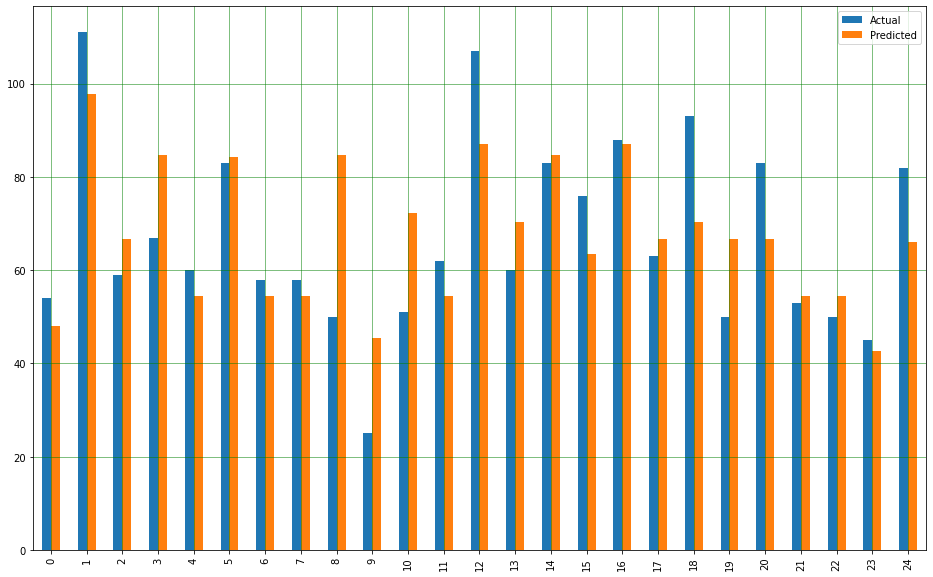

In [156]:
data2 = df.head(25)
data2.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [157]:
#calculate the metrics
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred2))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred2))


Mean Squared Error:  379.0473930190357
Mean Absolute Error:  13.380391171955694


In [158]:
# other regression models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [159]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training Score:", lr.score(X_train, y_train))
print("Testing Score:", lr.score(X_test, y_test))

y_pred3 = lr.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred3))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred3))


Training Score: 0.45277774692163586
Testing Score: 0.4496063816104582
Mean Squared Error:  511.51244818603067
Mean Absolute Error:  16.470789015771487


In [160]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

print("Training Score:", dt.score(X_train, y_train))
print("Testing Score:", dt.score(X_test, y_test))

y_pred4 = dt.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred4))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred4))

Training Score: 0.5934361106193803
Testing Score: 0.5921394686926121
Mean Squared Error:  379.048251863709
Mean Absolute Error:  13.380452423850658


In [161]:
# Random Forest Regressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print("Training Score:", rf.score(X_train, y_train))
print("Testing Score:", rf.score(X_test, y_test))

y_pred5 = rf.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred5))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred5))


Training Score: 0.5934342634353432
Testing Score: 0.5921319800523014
Mean Squared Error:  379.0552114878961
Mean Absolute Error:  13.379617507558939


In [162]:
# XGBoost Regressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

print("Training Score:", xgb.score(X_train, y_train))
print("Testing Score:", xgb.score(X_test, y_test))

y_pred7 = xgb.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred7))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred7))


Training Score: 0.5934361106158217
Testing Score: 0.5921394808598489
Mean Squared Error:  379.048240555996
Mean Absolute Error:  13.380451665912526


In [163]:
# sgb Regressor
from sklearn.linear_model import SGDRegressor

sgb = SGDRegressor()

sgb.fit(X_train, y_train)

print("Training Score:", sgb.score(X_train, y_train))
print("Testing Score:", sgb.score(X_test, y_test))

y_pred8 = sgb.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred8))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred8))


Training Score: 0.45274893451288645
Testing Score: 0.4495621550828529
Mean Squared Error:  511.55355044204225
Mean Absolute Error:  16.492837585242206


In [164]:
# CatBoost Regressor
cat = CatBoostRegressor( verbose=False, n_estimators=1000, random_state=42, learning_rate=0.05, max_depth=10, subsample=0.9)

cat.fit(X_train, y_train)

print("Training Score:", cat.score(X_train, y_train))
print("Testing Score:", cat.score(X_test, y_test))

y_pred9 = cat.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred9))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred9))



Training Score: 0.5934361106193802
Testing Score: 0.5921394686926125
Mean Squared Error:  379.04825186370874
Mean Absolute Error:  13.380452423850695


In [165]:
# xgb Regressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

print("Training Score:", xgb.score(X_train, y_train))

print("Testing Score:", xgb.score(X_test, y_test))

y_pred7 = xgb.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred7))

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred7))

Training Score: 0.5934361106158217
Testing Score: 0.5921394808598489
Mean Squared Error:  379.048240555996
Mean Absolute Error:  13.380451665912526


In [176]:
# mlp Regressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=2048)

mlp.fit(X_train, y_train)

print("Training Score:", mlp.score(X_train, y_train))
print("Testing Score:", mlp.score(X_test, y_test))

y_pred10 = mlp.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred10))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred10))


Training Score: 0.592160749947839
Testing Score: 0.5909643843958913
Mean Squared Error:  380.14032529144856
Mean Absolute Error:  13.47525388807774
